# Trabajo integrador - Parte 2
## Aprendizaje Supervisado

**Nombre**: Luis Pablo Segovia

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [1]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 

# Importamos la función que crea la regresión de sklearn
from sklearn.datasets import make_regression

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Cuarto ejercicio

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [4]:
# Debemos definir una función que permita generar cada simulación, dividir en train/test, ajustar modelo y validar
# Debemos también guardar los coeficientes de la regresión y RMSE y MAE
def generar_iteracion(n_informative=5):
    # Generar dataset

    """ ### Primer intento de generación de la regresión
    data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=n_informative,
                    n_targets=1,
                    noise=1.0,
                    # random_state=42, --> no debemos definirlo para que sea random
                    output='dataframe')

    # Definimos X e y del dataset
    X = data.drop('target', axis=1)
    y = data['target']
    """
    # Generamos los datos
    X, y, _ = make_regression(n_samples=1000,
                           n_features=10,
                           n_informative=n_informative,
                           n_targets=1,
                           noise=20.0,
                           #random_state=17,
                           shuffle=False,
                           coef=True,
                           bias=5)
    
    # Aplicamos el tran_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=17) # Lo definimos para que sea constante el split

    # Realizamos la regresión lineal
    lin_model = linear_model.LinearRegression()
    lin_model.fit(X_train, y_train)

    # Predecimos el target de test
    y_pred = lin_model.predict(X_test)

    # Calculamos RMSE
    rmse = mean_squared_error(y_test, y_pred)

    # Calculamos MAE
    mae = mean_absolute_error(y_test, y_pred)

    # Generamos la información de cada iteracion
    iter = []
    for coef in lin_model.coef_:
        iter.append(coef)
    iter.append(rmse)
    iter.append(mae)

    return iter    

In [5]:
# Generamos el DataFrame donde se guardarán los datos
df = pd.DataFrame(columns=['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8','coef9','coef10','rmse','mae'])

# Guardamos los 100 lotes generados
for iter in range(100):
    iter = generar_iteracion()
    df.loc[len(df)] = iter

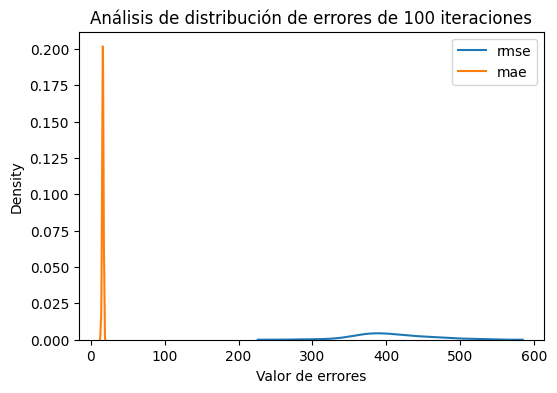

In [6]:
# Analizar distribución de RMSE y MAE
plt.figure(figsize=(6,4))
sns.kdeplot(df[['rmse','mae']])
plt.title("Análisis de distribución de errores de 100 iteraciones")
plt.xlabel("Valor de errores")
plt.show()

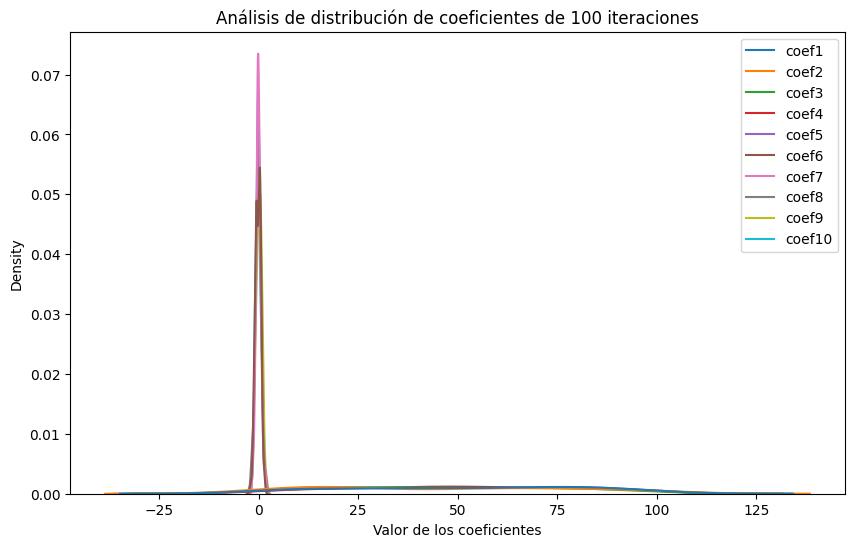

In [7]:
# Analizar distribución de coeficientes
plt.figure(figsize=(10,6))
sns.kdeplot(df[['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8','coef9','coef10']])
plt.title("Análisis de distribución de coeficientes de 100 iteraciones")
plt.xlabel("Valor de los coeficientes")
plt.show()

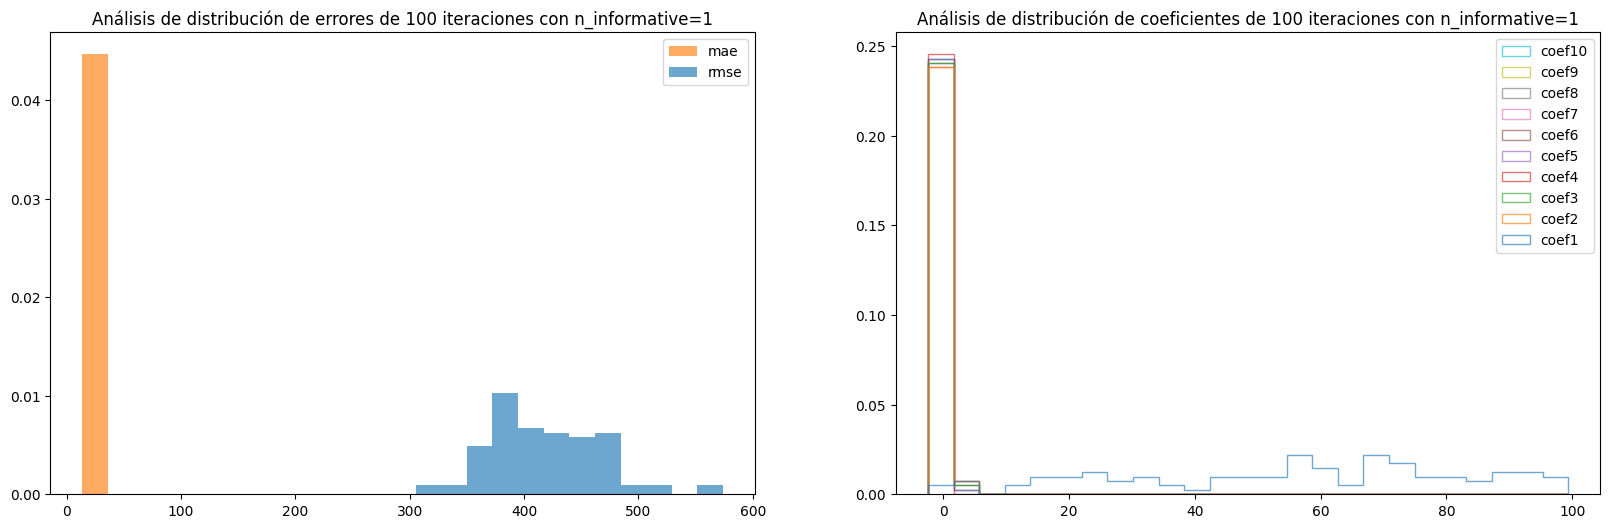

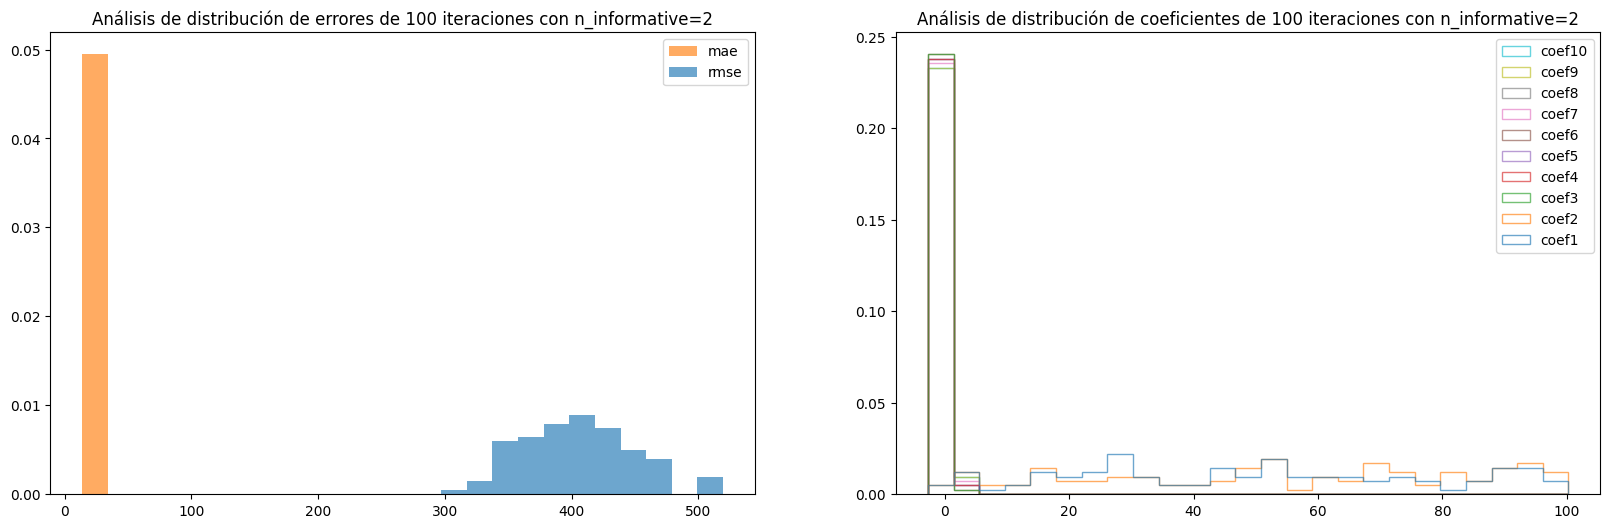

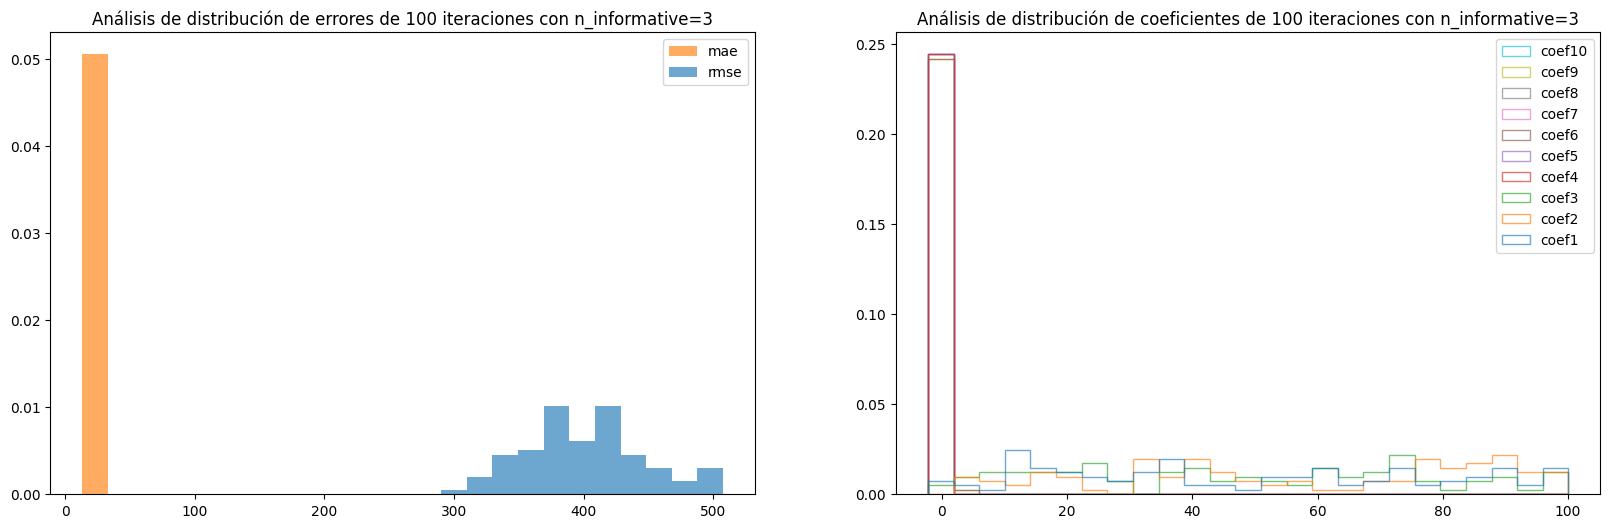

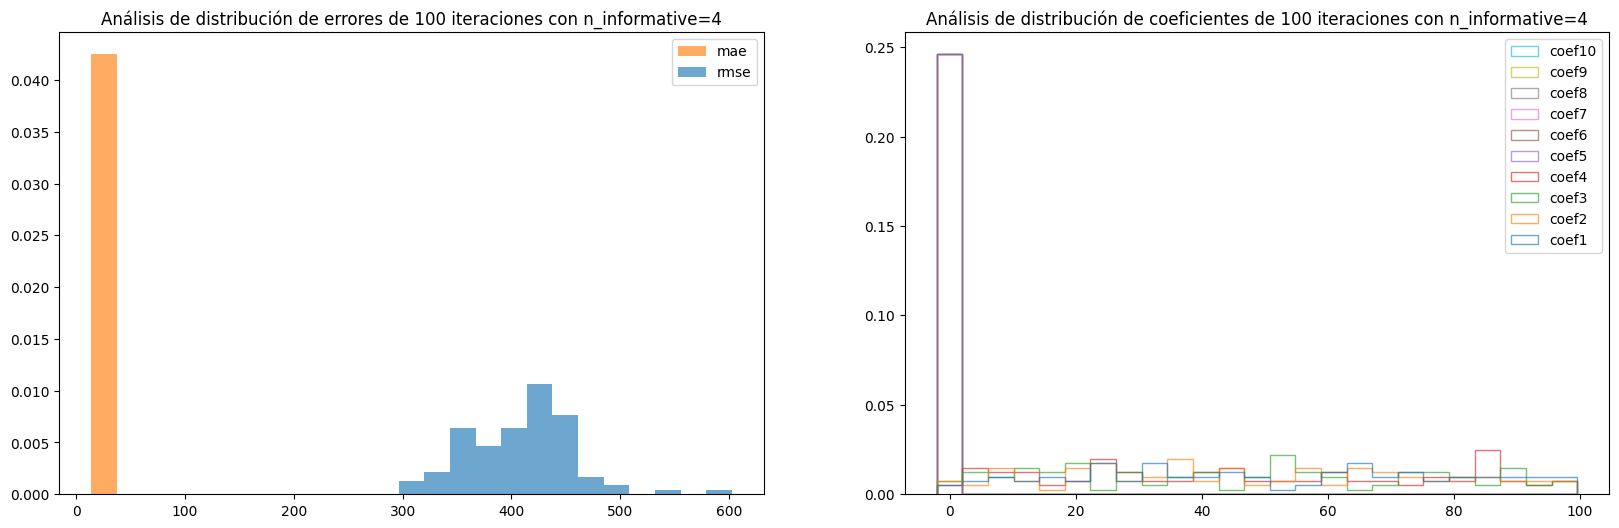

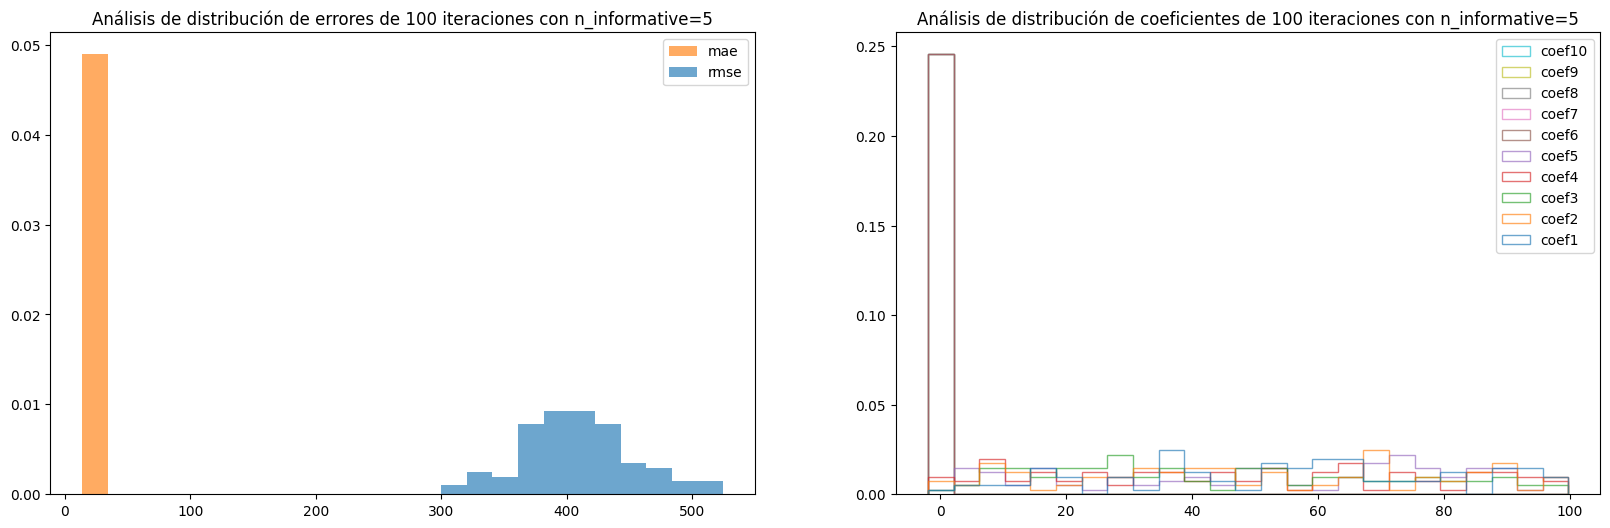

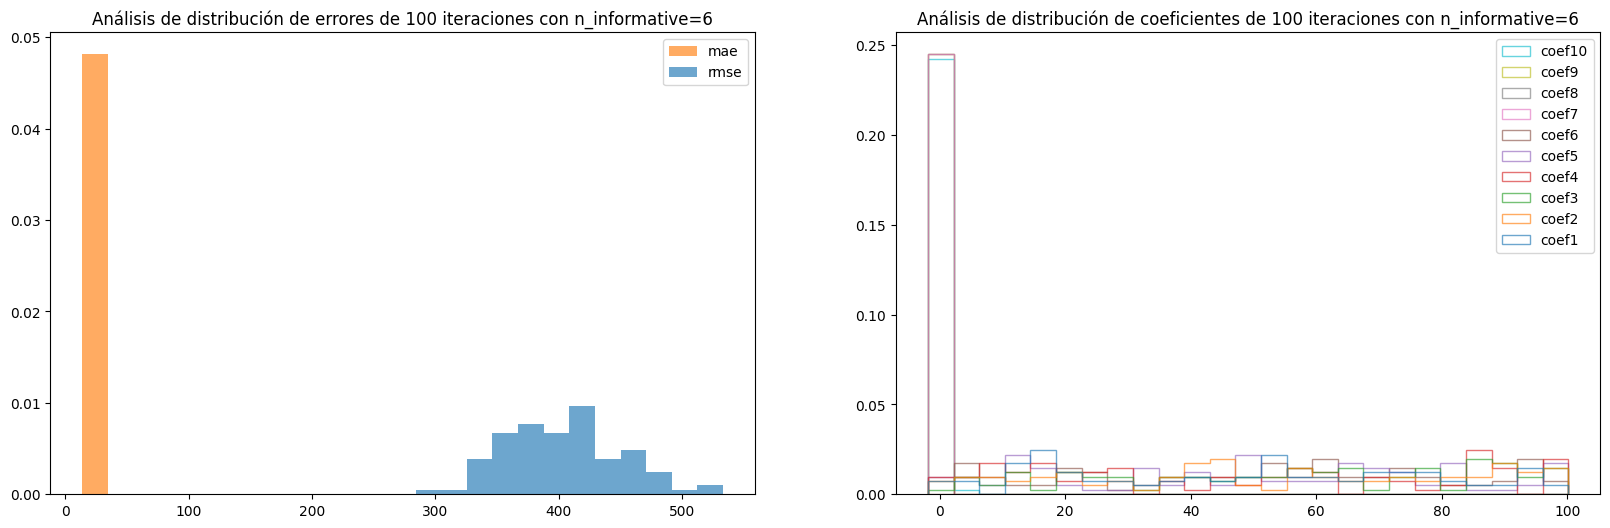

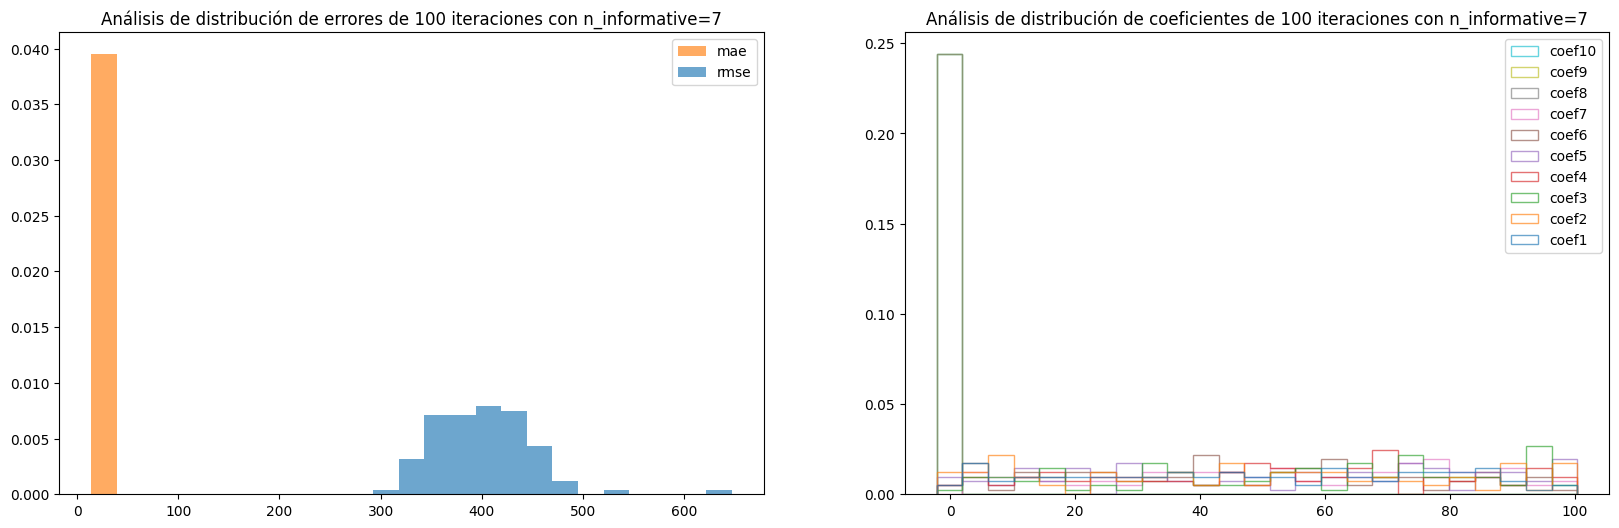

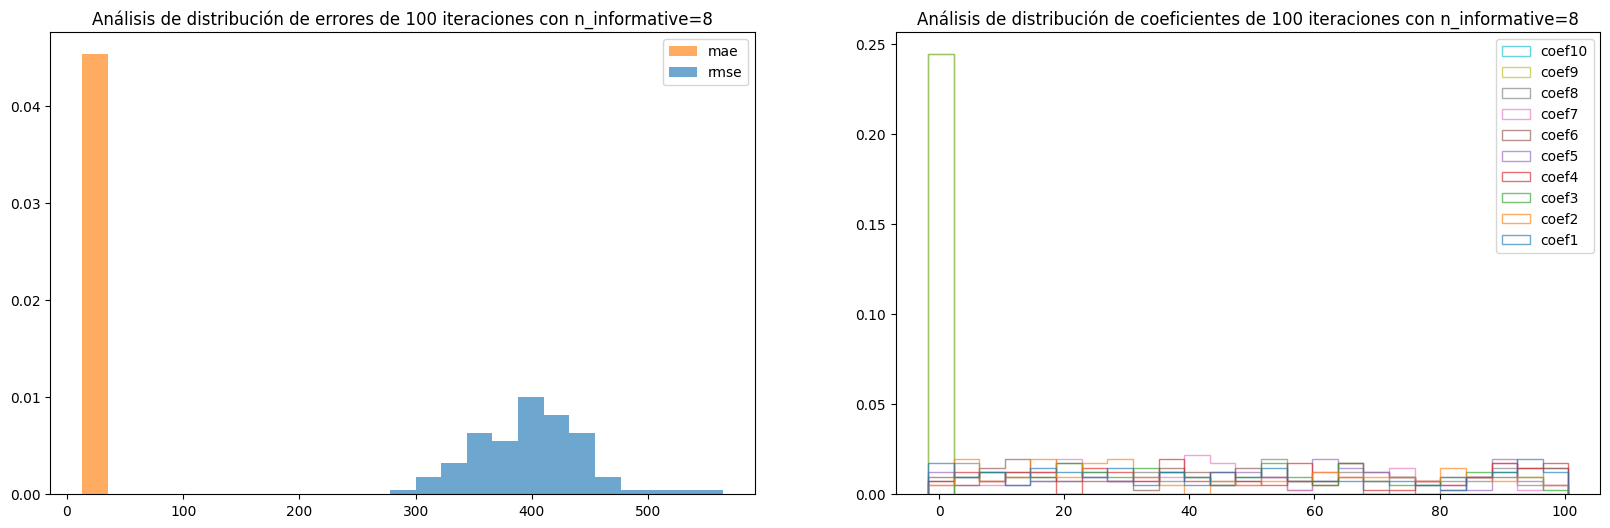

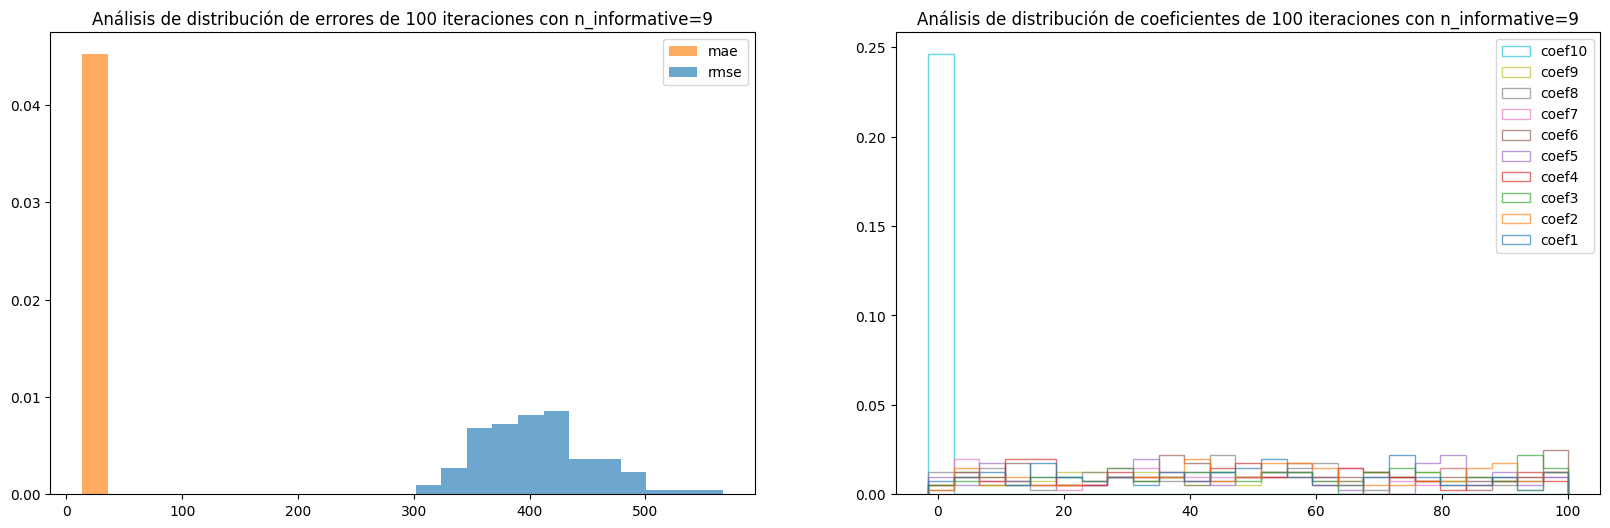

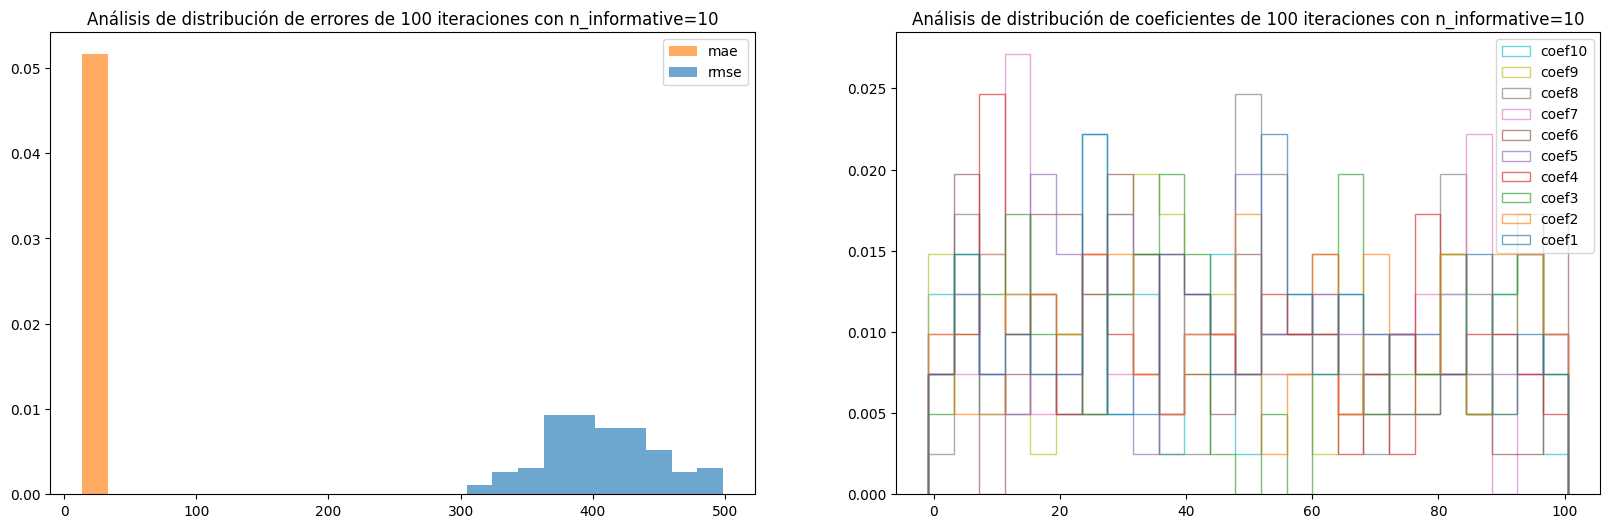

In [8]:
# Generamos las graficas de las distribuciones vs el número de features informativos
bins = 25
alpha = 0.65
for n in range(1,11):
    df = pd.DataFrame(columns=['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8','coef9','coef10','rmse','mae'])

    # Guardamos los 100 lotes generados
    for iter in range(100):
        iter = generar_iteracion(n)
        df.loc[len(df)] = iter

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    ax1.hist(df[['rmse','mae']], bins=bins, histtype='stepfilled', density=True, alpha=alpha, label=['rmse','mae'])
    ax1.set_title(f"Análisis de distribución de errores de 100 iteraciones con n_informative={n}")
    ax1.legend()
    ax2.hist(df[['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8','coef9','coef10']], histtype='step', bins=bins, density=True, alpha=alpha,
            label=['coef1','coef2','coef3','coef4','coef5','coef6','coef7','coef8','coef9','coef10'])
    ax2.set_title(f"Análisis de distribución de coeficientes de 100 iteraciones con n_informative={n}")
    ax2.legend()
    plt.show()   

## Insights encontrados
- Si tenemos _noise_ fijo, no se modifica la distribución de los errores vs el número de features informativos.
- Si tenemos _noise_ variable, mayor _noise_ implica mayor _RMSE_ (en media) que _MAE_. Aumenta la distancia entre las medias de cada error.
- A mayor _noise_, menor es el valor de _density_ de los errores, lo cual es lógico.
- Cuando aumenta el número de features informativos, la distribución de los coeficientes de las _X_ se vuelven más uniformes.
- Los coeficientes de las variables no informativas, mayormente distribuyen en el _cero_, no importa el _n_informative_.

## Quinto ejercicio


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [9]:
from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV

In [15]:
# Generamos el dataframe que va a alimentar el ejercicio
X, y, _ = make_regression(n_samples=1000, n_features=10,n_informative=5, n_targets=1, noise=20.0, #random_state=17,
                          shuffle=False, coef=True, bias=5)
df = pd.DataFrame(X, columns=[f'x{i}' for i in range(10)])
df['target'] = y

In [22]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'target'], dtype='object')

In [29]:
out_test = generate_outliers(df, cols=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'], percentage=0.25)

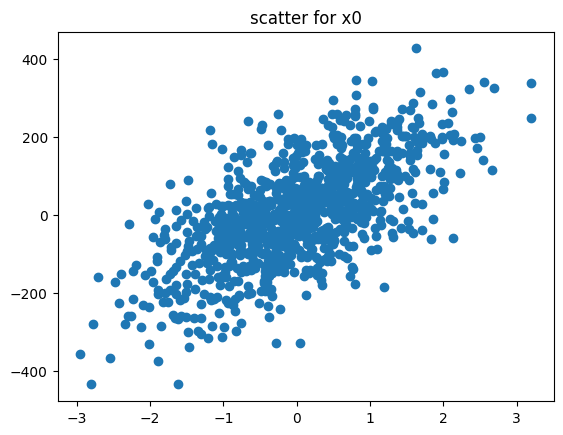

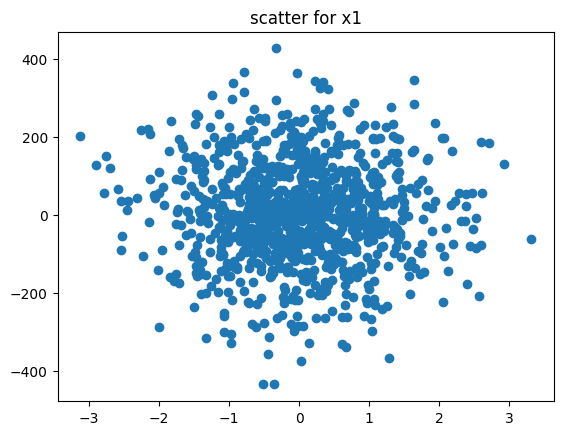

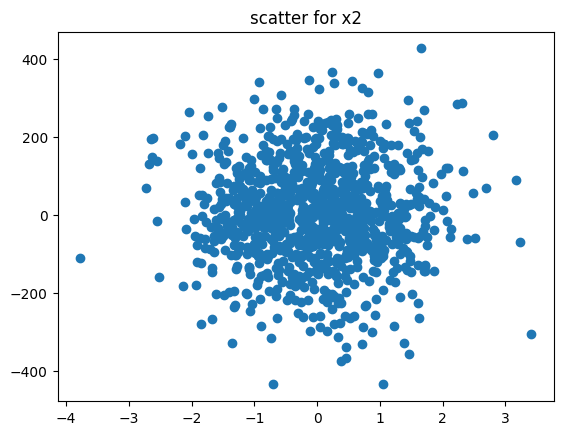

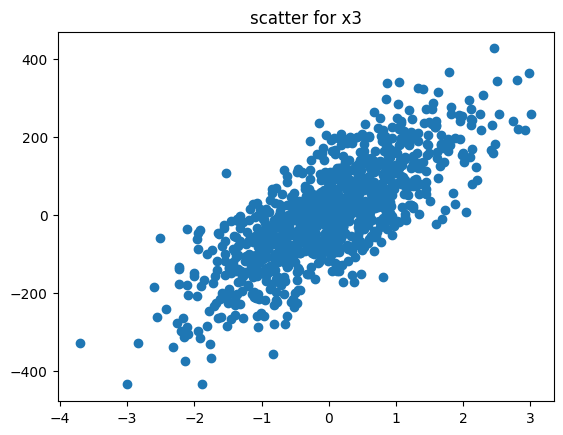

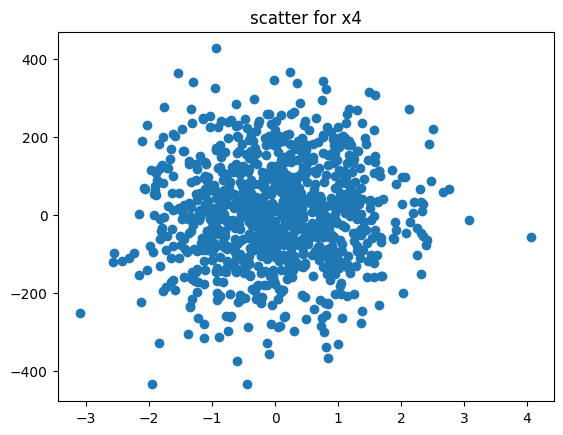

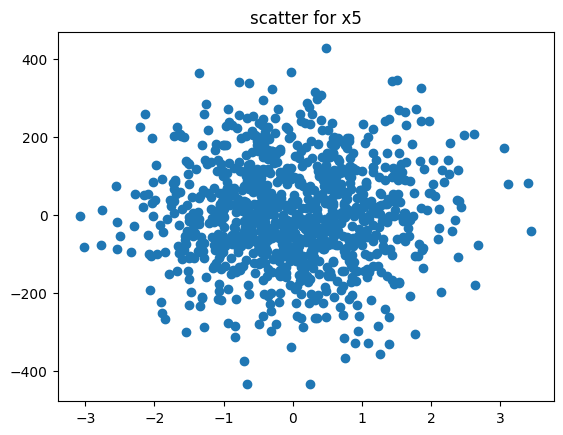

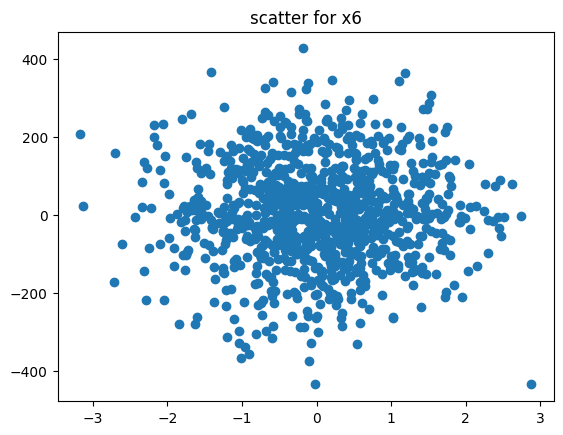

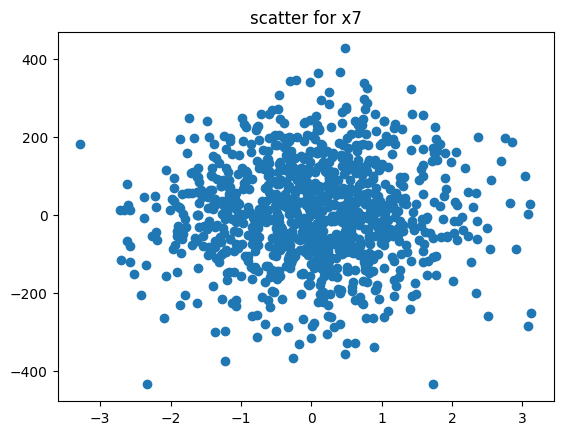

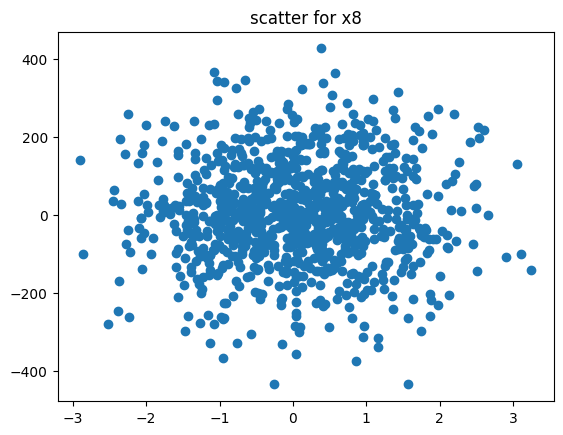

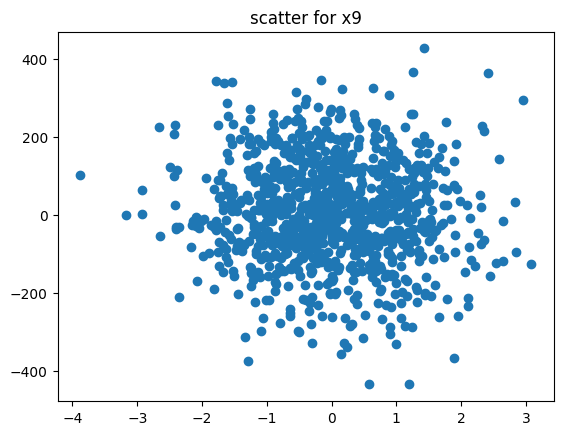

In [30]:
for i in range(10):
    plt.scatter(out_test[f'x{i}'], out_test['target'])
    plt.title(f'scatter for x{i}')
    plt.show()